# LC HPC Axon GcAMP TFC Analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import sys
# change pkg_path variable to the directory storing the package
pkg_path = '../utility_code'
sys.path.insert(0, pkg_path)
import fp_viz, fp_dat
import seaborn as sns
import pingouin as pg

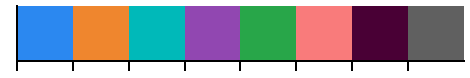

In [2]:
fp_viz.plot_style()
npg_pal=['#2b88f0', '#EF862E', '#00B9B9', '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060']
fp_viz.set_palette(['#2b88f0', '#EF862E', '#00B9B9', '#9147B1', '#28A649', '#F97B7B', '#490035', '#606060'], show = True)

In [3]:
df_train_trials = pd.read_csv(
    './data-clean/LC_HPC_Axon_GCaMP_TFC.csv')


/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/jake/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


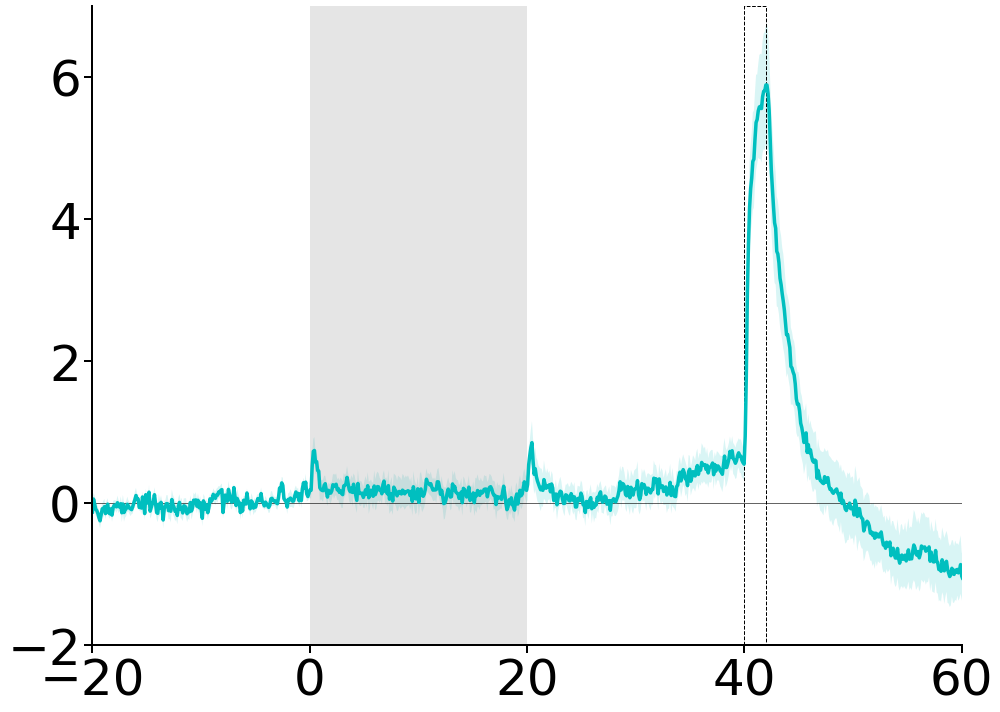

In [4]:
fp_viz.tfc_trial_avg(df_train_trials,
                     yvar = '465nm_dFF_norm',
                     fig_size = (14,10),linewidth = 3.5, color = 'c')

plt.ylim(-2, 6.99)
plt.xlim(-20,60)


ax = plt.gca()

tick_size=50


ax.tick_params(labelsize=tick_size, width=2, length=8)
ax.set_ylabel('')
ax.set_xlabel('')

plt.tight_layout()


# Analyze the significance of responses to tone and shock

In [5]:
# Tone Onset
tfc_train_prepost = fp_dat.calc_pre_post(df_train_trials, event = 'tone',  t_pre=(-2,0), t_post=(0,2), measure = 'max')
fp_dat.pre_post_stats(tfc_train_prepost,  yvar='465nm_dFF_norm')

t-statistic: 2.77000669134054
p-value: 0.01978707260663026


In [6]:
# Tone termination
tfc_train_termination_prepost = fp_dat.calc_pre_post(df_train_trials, event = 'tone',  t_pre=(18,20), t_post=(20,22), measure = 'max')
fp_dat.pre_post_stats(tfc_train_termination_prepost,  yvar='465nm_dFF_norm')

t-statistic: 3.031748210025632
p-value: 0.01263936082047287


In [7]:
# Shock
tfc_train_shock_prepost = fp_dat.calc_pre_post(df_train_trials, event = 'tone',  t_pre=(38,40), t_post=(40,42), measure = 'max')
fp_dat.pre_post_stats(tfc_train_shock_prepost,  yvar='465nm_dFF_norm')

t-statistic: 8.090198747021502
p-value: 1.0672122243831796e-05
